# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

Here is a data set of sales figures from different stores.

In [2]:
data = pd.read_csv('sales.csv')
data

,net_sales,sq_ft,inventory,advertising,district_size,competing_stores
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


Let's try to predict net sales from two variables: the square footage (size) of the store, and the number of competing stores in the area. Our model will be:

$$
\text{net sales} \approx b_0 + b_1 \times \text{sqft} + b_2 \times \text{competitors}
$$

Do you expect $b_1$ to be positive or negative? What about $b_2$?

Here is what the data looks like:

In [3]:
sq_ft = np.asarray(data['sq_ft'])
competing = np.asarray(data['competing_stores'])
net_sales = np.asarray(data['net_sales'])

Text(0.5,0,'competing_stores')

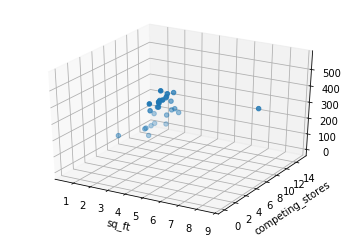

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, competing, net_sales)
plt.xlabel('sq_ft')
plt.ylabel('competing_stores')

Our design matrix is:
    
$$
\begin{pmatrix}
 1 & s_1 & c_1\\
 1 & s_2 & c_2\\
 \vdots & \vdots & \vdots\\
 1 & s_n & c_n
\end{pmatrix}
$$

where $s_i$ is the size of the $i$th store, and $c_n$ is the number of competitors. In code:

In [5]:
X = np.column_stack((
    np.ones_like(sq_ft),
    sq_ft,
    competing
))

Solving the system $X^\intercal X \vec b = X^\intercal \vec y$:

In [6]:
b = np.linalg.solve(X.T @ X, X.T @ net_sales)
b

array([303.49073761,  45.15092186, -21.5851804 ])

The function $h$ that we have fit is not a line; it is a plane:

NameError: name 'Y' is not defined

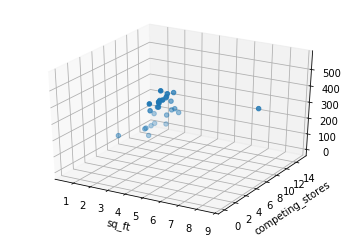

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_ft, competing, net_sales)
plt.xlabel('sq_ft')
plt.ylabel('competing_stores')

XX, YY = np.mgrid[1:10:2, 0:16:2]
Z = b[0] + b[1]*X + b[2]*Y
ax.plot_wireframe(XX, YY, Z, color='black', alpha=.5)

In [ ]:
b

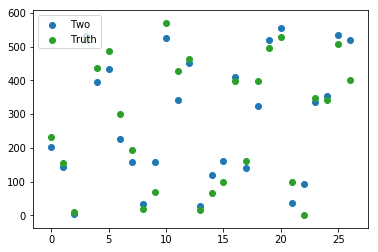

In [38]:
plt.scatter(np.arange(len(net_sales)), X @ b, label='Two', color='C0')
plt.scatter(np.arange(len(net_sales)), net_sales, label='Truth', color='C2')
plt.legend(loc='upper left')

Now let's use all of the features to make our prediction.

In [14]:
X_full = data.iloc[:,1:].values

In [18]:
b_full = np.linalg.solve(X_full.T @ X_full, X_full.T @ net_sales)

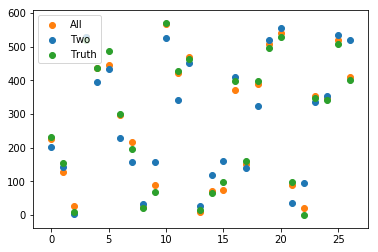

In [40]:
plt.scatter(np.arange(len(net_sales)), X_full @ b_full, label='All', color='C1')
plt.scatter(np.arange(len(net_sales)), X @ b, label='Two', color='C0')
plt.scatter(np.arange(len(net_sales)), net_sales, label='Truth', color='C2')
plt.legend(loc='upper left')